In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore")

In [8]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [10]:
import pathlib
filePath = pathlib.Path("C:\Datasets\Mall_Customers.csv")
df = pd.read_csv(filePath)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.columns =['CustomerID', 'Gender', 'Age', 'Annual_Income',
       'Spending_Score']
df.sample(5)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
141,142,Male,32,75,93
190,191,Female,34,103,23
18,19,Male,52,23,29
69,70,Female,32,48,47
154,155,Female,47,78,16


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Gender'>

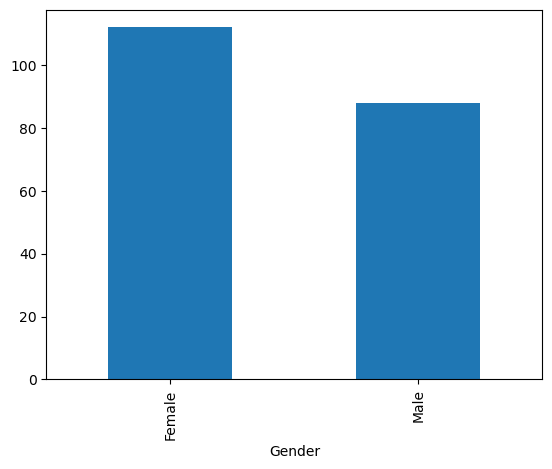

In [22]:
df["Gender"].value_counts().plot(kind="bar")

<Figure size 1600x1000 with 0 Axes>

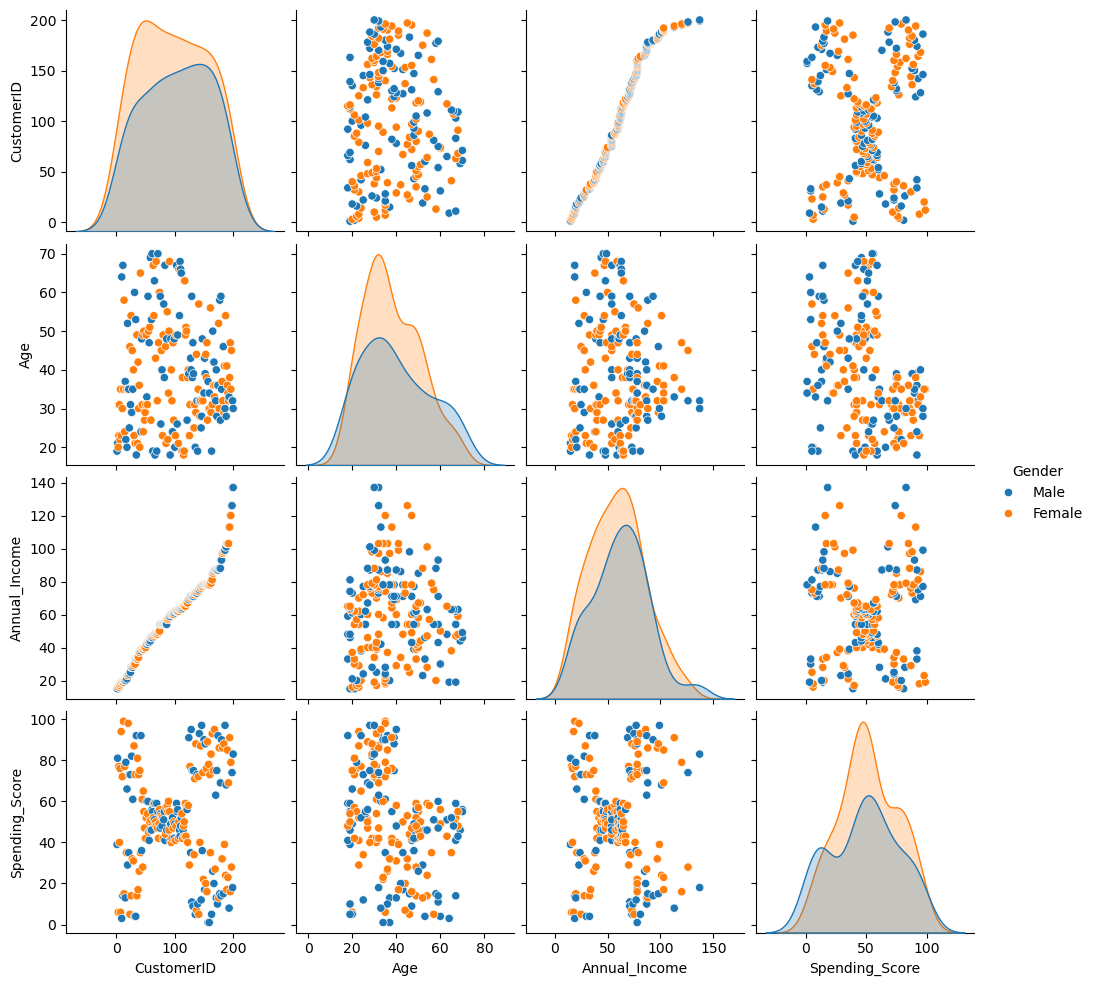

In [24]:
plt.figure(figsize=(16,10))
sns.pairplot(data=df, hue="Gender")
plt.show()

In [28]:
df["Gender"] = df["Gender"].map({'Male':1,'Female':0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      200 non-null    int64
 1   Gender          200 non-null    int64
 2   Age             200 non-null    int64
 3   Annual_Income   200 non-null    int64
 4   Spending_Score  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [30]:
df = df.drop(columns="CustomerID")
df

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


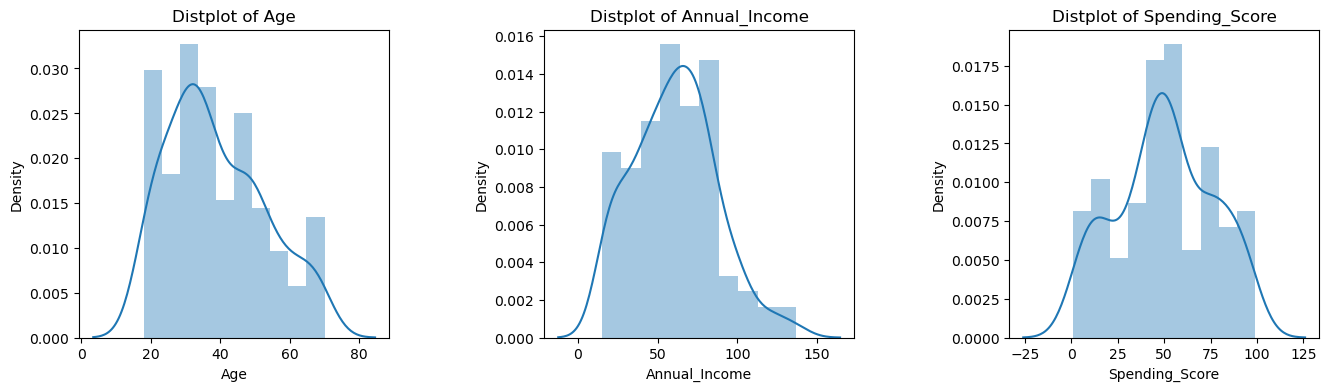

In [32]:
plt.figure(1,figsize=(16,4))
n=0
for x in ["Age","Annual_Income","Spending_Score"]:
    n+=1;
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=10,)
    plt.title(f"Distplot of {x}")
plt.show()

In [44]:
## Elbow and Silhouett method

km_inertias, km_scores = [],[]

for k in range(3,10):
    km=KMeans(n_clusters=k).fit(df)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(df,km.labels_))
    print(f"Processing K-Means with k = {k}, Intertia = {km.inertia_}\
    , Silhoutte Score = {km_scores[-1]}")

Processing K-Means with k = 3, Intertia = 157981.67447892812    , Silhoutte Score = 0.3112016998370277
Processing K-Means with k = 4, Intertia = 105446.5035188934    , Silhoutte Score = 0.3895563776923463
Processing K-Means with k = 5, Intertia = 82686.02774127264    , Silhoutte Score = 0.37784252210823865
Processing K-Means with k = 6, Intertia = 58364.96860002744    , Silhoutte Score = 0.4513562828608042
Processing K-Means with k = 7, Intertia = 54667.38474488475    , Silhoutte Score = 0.4027115338363697
Processing K-Means with k = 8, Intertia = 47777.03435569061    , Silhoutte Score = 0.39486528096696183
Processing K-Means with k = 9, Intertia = 45543.9415821107    , Silhoutte Score = 0.381317915750129


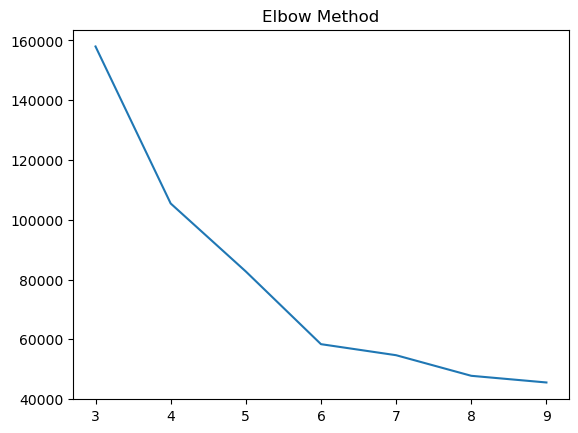

In [48]:
sns.lineplot(x=range(3,10),y=km_inertias)
plt.title("Elbow Method")
plt.show()

In [60]:
km_scores.index(max(km_scores)) + 3 

6

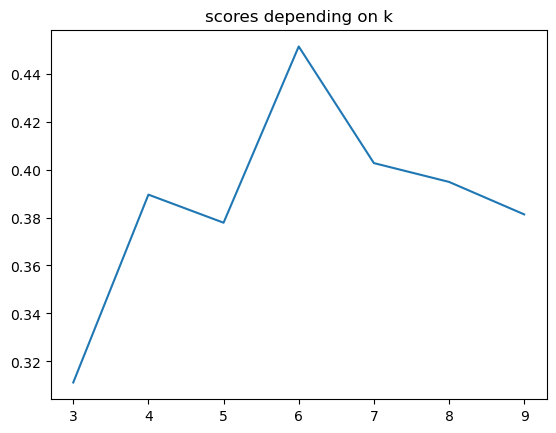

In [64]:
sns.lineplot(x=range(3, 10), y=km_scores)
plt.title('scores depending on k')
plt.show()

In [68]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

In [70]:
sc = StandardScaler()

X = sc.fit_transform(df)

## Applying KMean clustring, and DBSCAN

In [73]:
## KMEAN

knn = KMeans(n_clusters=6)
knn.fit(X)

df["Labels_KNN"] = knn.labels_
df.head()

,Gender,Age,Annual_Income,Spending_Score,Labels_KNN
0,1,19,15,39,5
1,1,21,15,81,5
2,0,20,16,6,2
3,0,23,16,77,0
4,0,31,17,40,2


In [77]:
params = {"eps" : np.arange(0.3,1.1,0.1), "min_samples" : range(3,11)}
gcv = GridSearchCV(estimator=DBSCAN(), param_grid=params, cv=5, scoring="adjusted_rand_score")
gcv.fit(X)

GridSearchCV(cv=5, estimator=DBSCAN(),
             param_grid={'eps': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'min_samples': range(3, 11)},
             scoring='adjusted_rand_score')

In [103]:
pd.DataFrame(gcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eps,param_min_samples,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008286,0.005636,0.005664,0.011327,0.3,3,"{'eps': 0.3, 'min_samples': 3}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.003209,0.006418,0.000102,0.000203,0.3,4,"{'eps': 0.3, 'min_samples': 4}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.002059,0.001754,0.003119,0.006238,0.3,5,"{'eps': 0.3, 'min_samples': 5}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0.004504,0.006183,0.000000,0.000000,0.3,6,"{'eps': 0.3, 'min_samples': 6}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,0.003120,0.003019,0.001559,0.003117,0.3,7,"{'eps': 0.3, 'min_samples': 7}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.000805,0.000986,0.000000,0.000000,1.0,6,"{'eps': 1.0000000000000002, 'min_samples': 6}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
60,0.001568,0.001922,0.001651,0.003302,1.0,7,"{'eps': 1.0000000000000002, 'min_samples': 7}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
61,0.003305,0.006609,0.000000,0.000000,1.0,8,"{'eps': 1.0000000000000002, 'min_samples': 8}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
62,0.004269,0.005711,0.000000,0.000000,1.0,9,"{'eps': 1.0000000000000002, 'min_samples': 9}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [81]:
 DB_model = gcv.best_estimator_

In [91]:
lables = DB_model.labels_
lables

array([-1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  2,  3,  3,  3,  2,
       -1, -1, -1,  2, -1,  2, -1,  3, -1, -1,  4, -1, -1, -1,  4, -1, -1,
        4, -1, -1,  5, -1, -1, -1,  8, -1, -1,  6,  5, -1, -1, -1,  5,  6,
        7, -1,  6, -1,  5, -1, 12,  7, 11, -1,  8,  5, -1,  7, 12, -1,  5,
       -1,  8,  7, -1, -1, -1,  9,  9,  9, 10, 11, 12, 10, 10, -1, -1, -1,
       -1,  8, 11, -1, -1, -1, 13, -1, -1, -1, -1, -1, -1, -1, 13, -1, 13,
       -1, -1, -1, 13, -1, -1, -1, 13, -1, -1, -1, 13, -1, -1, -1, -1, -1,
       -1, -1, 13, -1, 13, -1, 13, -1, 13, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [95]:
list(lables).count(-1)

144

In [105]:
df["Lable_DBSCAN"] = lables

In [107]:
df.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score', 'Labels_KNN',
       'Lable_DBSCAN'],
      dtype='object')

In [109]:
pivot = df.pivot_table(values=['Age', 'Annual_Income', 'Spending_Score'], index=["Labels_KNN"],
                      aggfunc=np.mean)
pivot

,Age,Annual_Income,Spending_Score
Labels_KNN,,,
0,28.392857,60.428571,68.178571
1,52.200000,32.100000,19.000000
2,48.490196,53.000000,36.019608
3,38.958333,90.875000,16.083333
4,60.000000,54.944444,49.666667
5,28.536585,61.804878,71.097561


<Axes: xlabel='Labels_KNN'>

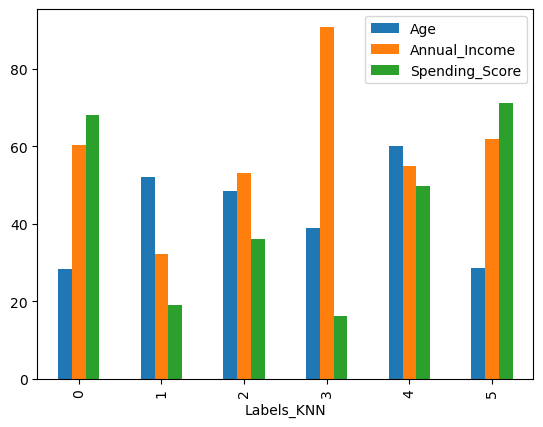

In [113]:
pivot.plot(kind="bar")

<Axes: xlabel='Lable_DBSCAN'>

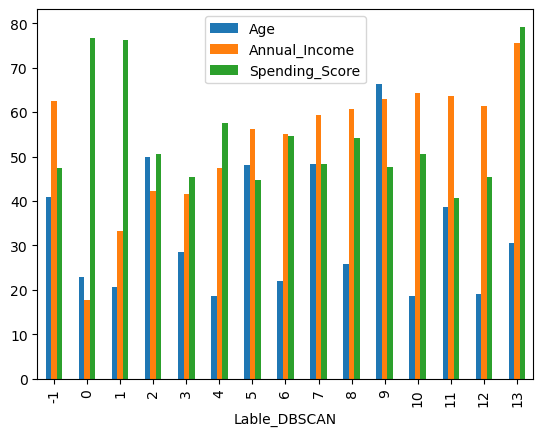

In [115]:
pivot2 = df.pivot_table(values=['Age', 'Annual_Income', 'Spending_Score'], index=["Lable_DBSCAN"],
                      aggfunc=np.mean)
pivot2.plot(kind="bar")

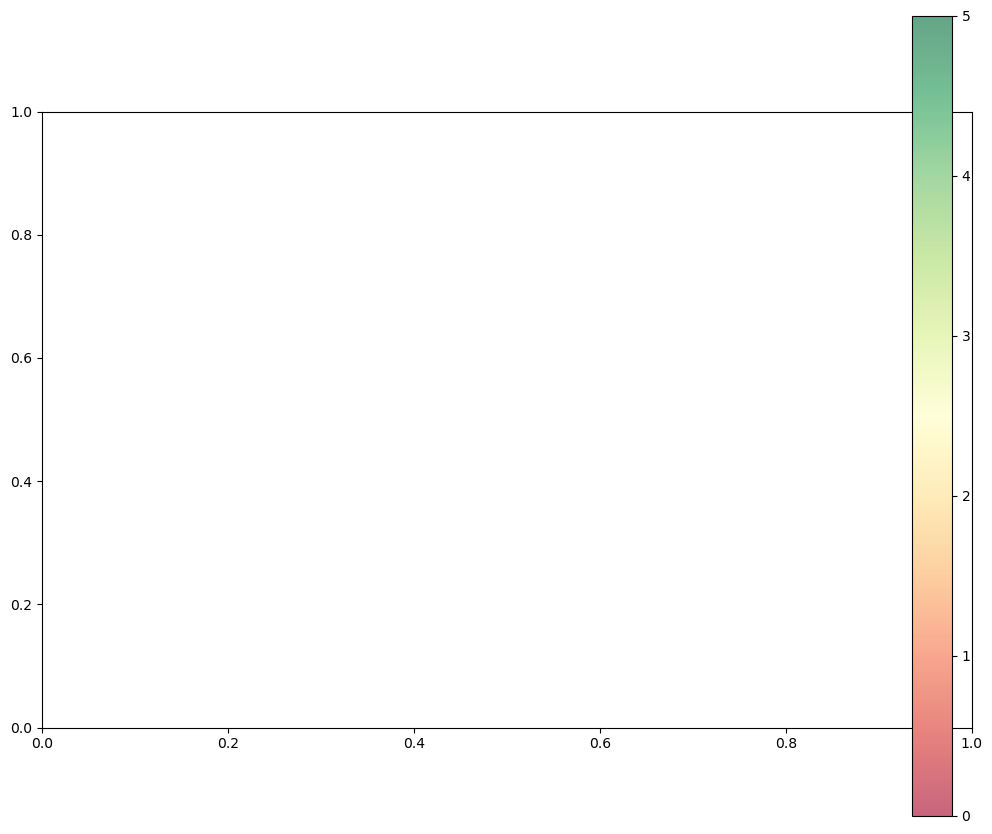

In [123]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

xs = df['Age']
ys = df['Annual_Income']
zs = df['Spending_Score']
im = ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=df["Labels_KNN"], cmap='RdYlGn')
fig.colorbar(im, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Annual income')
ax.set_zlabel('Spending score')

plt.show()

In [121]:
df

,Gender,Age,Annual_Income,Spending_Score,Labels_KNN,Lable_DBSCAN
0,1,19,15,39,5,-1
1,1,21,15,81,5,-1
2,0,20,16,6,2,-1
3,0,23,16,77,0,0
4,0,31,17,40,2,-1
...,...,...,...,...,...,...
195,0,35,120,79,0,-1
196,0,45,126,28,3,-1
197,1,32,126,74,5,-1
198,1,32,137,18,3,-1
